### import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

#### load the dataset

In [2]:
data = pd.read_csv("twitterhate.csv")

In [3]:
# displaying the top 5 rows
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
# getting info from the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
data.shape

(31962, 3)

#### checking null values

In [6]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

  there are no missing values in the data

#### checking duplicates

In [7]:
data.duplicated().sum()

0

there are no duplicates in dataset

## Data pre-processing

In [8]:
data["tweet"].iloc[[1,2,3,4,5]]

1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model   i love u take with u all the time in ...
4               factsguide: society now    #motivation
5    [2/2] huge fan fare and big talking before the...
Name: tweet, dtype: object

In [9]:
def processing(txt):
    txt = txt.lower()
    txt = re.sub(r"https\S+|www\S+http\S+", '', txt, flags = re.MULTILINE)
    txt = re.sub(r'\@w+|\#','', txt)
    txt = re.sub(r'[^\w\s]','',txt)
    txt = re.sub(r'ð','',txt)
    tweets = word_tokenize(txt)
    filter_tweets = [i for i in tweets if not i in stop_words]
    return " ".join(filter_tweets)

In [10]:
data["tweet"] = data['tweet'].apply(processing)

### lemmatization

In [11]:
lemmatizer = WordNetLemmatizer()
def lemmatize(data):
    tweet = [lemmatizer.lemmatize(word) for word in data]
    return data

In [12]:
data['tweet'] = data['tweet'].apply(lambda x: lemmatize(x))

In [13]:
data["tweet"].iloc[[1,2, 3, 4, 5]]

1    user user thanks lyft credit cant use cause do...
2                                       bihday majesty
3                          model love u take u time ur
4                        factsguide society motivation
5    22 huge fan fare big talking leave chaos pay d...
Name: tweet, dtype: object

In [14]:
data["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

#### getting positive tweet from the data set

In [15]:
pos_tweet = data[data["label"] == 0]

In [16]:
pos_tweet.sample(3)

,id,label,tweet
993,994,0,glad arrived safely user
31642,31643,0,hanging table trying sneak food mommy ¾ austin...
2788,2789,0,wow sure teach skillset seminary cultureofdeath


#### getting negative tweets from the dataset

In [17]:
neg_tweet = data[data["label"]==1]

In [18]:
neg_tweet.sample(3)

,id,label,tweet
20064,20065,1,immature user trying make fool user xenophobe ...
8451,8452,1,user comes supermistict douchebag poke nose sm...
30902,30903,1,user waiting somebody call dont see anybody


### Data visualization

<AxesSubplot:>

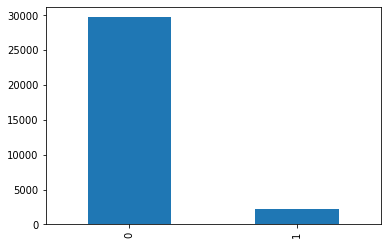

In [19]:
data["label"].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='label'>

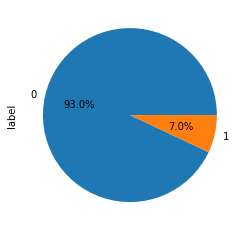

In [20]:
data["label"].value_counts().plot(kind="pie" , autopct = '%1.1f%%')

here we can clearly see that positive tweets are higher than negative ones

### Word Cloud

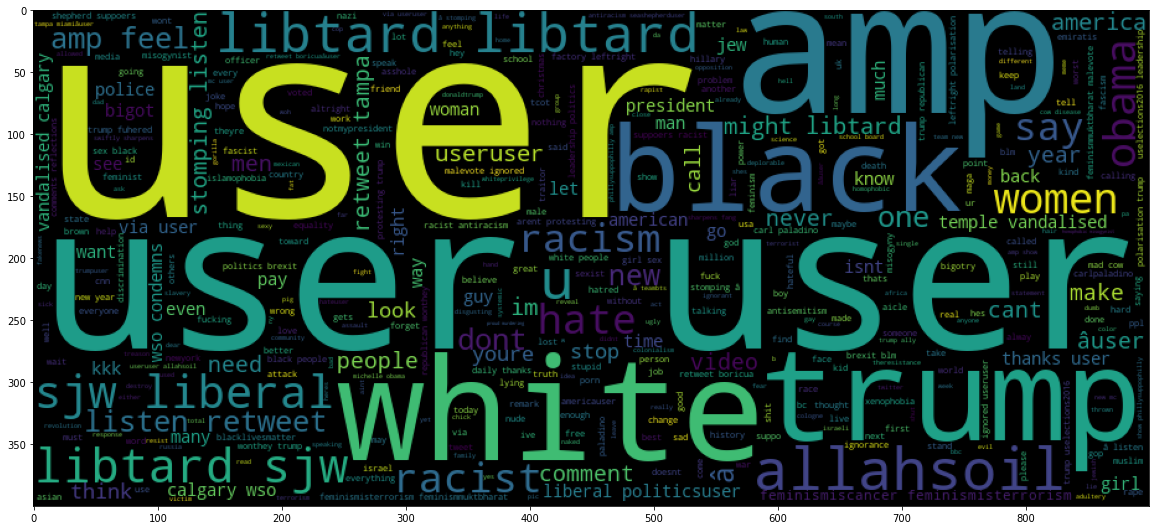

In [21]:
text = "".join([word for word in neg_tweet["tweet"]])
plt.figure(figsize=(20,15), facecolor='None')
wordCloud = WordCloud(width=900 ,height=400 , max_words=400).generate(text)
plt.imshow(wordCloud)

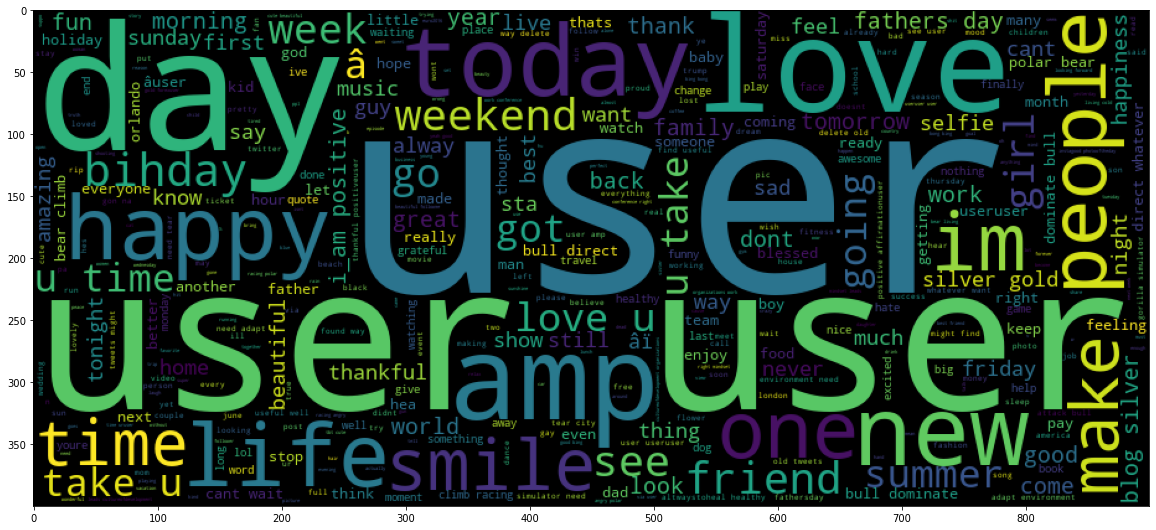

In [22]:
text = "".join([word for word in pos_tweet["tweet"]])
plt.figure(figsize=(20,15), facecolor='None')
wordCloud = WordCloud(width=900 ,height=400 , max_words=400).generate(text)
plt.imshow(wordCloud)

### splitting data into train and test

In [23]:
x = data["tweet"]
y = data["label"]

In [24]:
vect = TfidfVectorizer()
x = vect.fit_transform(data["tweet"])

In [25]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.3, random_state=42)

In [26]:
x_train.shape

(22373, 43966)

In [27]:
x_test.shape

(9589, 43966)

In [28]:
y_train.shape

(22373,)

In [29]:
y_test.shape

(9589,)

# Model Building

### LogisticRegression

In [30]:
log_reg = LogisticRegression()
log_reg.fit(x_train , y_train)
y_pred = log_reg.predict(x_test)

In [31]:
log_acc = accuracy_score(y_pred , y_test)

In [32]:
log_acc

0.9427468974867035

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8905
           1       0.92      0.22      0.35       684

    accuracy                           0.94      9589
   macro avg       0.93      0.61      0.66      9589
weighted avg       0.94      0.94      0.93      9589



### DecisionTree

In [34]:
dt = DecisionTreeClassifier()
dt.fit(x_train , y_train)
dt_pred = dt.predict(x_test)

In [35]:
dt_acc = accuracy_score(dt_pred , y_test)

In [36]:
dt_acc

0.9422254666805715

In [37]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8905
           1       0.62      0.48      0.54       684

    accuracy                           0.94      9589
   macro avg       0.79      0.73      0.76      9589
weighted avg       0.94      0.94      0.94      9589



### RandomForest

In [38]:
rf = RandomForestClassifier()
rf.fit(x_train , y_train)
rf_pred = rf.predict(x_test)

In [39]:
rf_acc = accuracy_score(rf_pred , y_test)

In [40]:
rf_acc

0.9546355198665137

In [41]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8905
           1       0.90      0.41      0.56       684

    accuracy                           0.95      9589
   macro avg       0.93      0.70      0.77      9589
weighted avg       0.95      0.95      0.95      9589



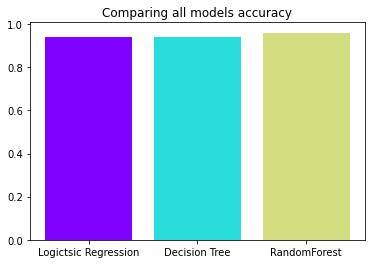

In [42]:
accuracy = np.array([0.94 , 0.94, 0.96  ])
labels = np.array(["Linear Regression" , "Decision Tree" , "RandomForest"])
index = np.argsort(accuracy)
color = plt.cm.rainbow(np.linspace(0, 1, 4))

plt.bar(range(len(index)) , accuracy[index], color = color )
plt.xticks(range(0,3),["Logictsic Regression" , "Decision Tree" , "RandomForest"])
plt.title("Comparing all models accuracy")
plt.show()

- random forest has given the best accuracy